# Анализ данных из файла 'Kuiper.xls'

В данном ноутбуке проводится анализ данных из набора `Kuiper.xls`, включающий переменные `Price`, `Mileage`, `Cylinder`, `Liter`, `Cruise`. Выполним последовательные шаги для корреляционного анализа, построения модели линейной регрессии, проверки значимости, анализа выбросов, и улучшения модели.

## Загрузка данных

In [155]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from scipy.stats import boxcox

# Загрузка данных
data = pd.read_excel('data/kuiper.xls')

data = data[["Price", "Mileage", "Cylinder", "Liter", "Cruise"]]
data.head()


,Price,Mileage,Cylinder,Liter,Cruise
0,17314.103129,8221,6,3.1,1
1,17542.036083,9135,6,3.1,1
2,16218.847862,13196,6,3.1,1
3,16336.913140,16342,6,3.1,1
4,16339.170324,19832,6,3.1,1


## Шаг 1: Корреляционный анализ

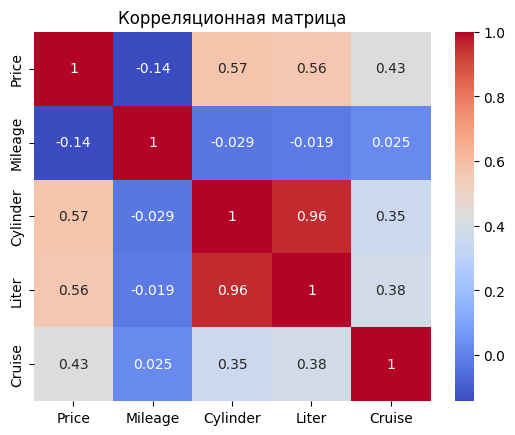

In [156]:
# Проведение корреляционного анализа
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

## Шаг 2: Базовая модель линейной регрессии

In [157]:
# Построение базовой модели линейной регрессии
X = data[['Mileage', 'Cylinder', 'Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)  # Добавление константы

model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.79e-88
Time:                        17:54:55   Log-Likelihood:                -8329.0
No. Observations:                 804   AIC:                         1.667e+04
Df Residuals:                     799   BIC:                         1.669e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2799.8569   1543.265      1.814      0.070    -229.475    5829.189
Mileage       -0.1644      0.033     -4.977      0.000      -0.229      -0.100
Cylinder    3007.8027    679.271      4.428      0.000    1674.436    4341.169
Liter        455.7311    860.596      0.530      0.597   -1233.565    2145.027
Cruise      6076.0488    676.570      8.981      0.000    4747.984    7404.114
==============================================================================
Omnibus:                      187.995   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.298
Skew:                           1.297   Prob(JB):                     1.45e-86
Kurtosis:                       5.253   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Шаг 3: Уравнение линейной регрессии

In [158]:

# Вывод уравнения регрессии
coefficients = model.params
equation = f"Price = {coefficients['const']:.4f} + {coefficients['Mileage']:.4f} * Mileage + {coefficients['Cylinder']:.4f} * Cylinder + {coefficients['Liter']:.4f} * Liter + {coefficients['Cruise']:.4f} * Cruise"
print("Уравнение линейной регрессии:")
print(equation)


Уравнение линейной регрессии:
Price = 2799.8569 + -0.1644 * Mileage + 3007.8027 * Cylinder + 455.7311 * Liter + 6076.0488 * Cruise


## Шаг 4: Проверка значимости коэффициентов с помощью T-теста

In [159]:
# Проверка значимости каждого коэффициента
print(model.t_test(np.eye(len(model.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          2799.8569   1543.265      1.814      0.070    -229.475    5829.189
c1            -0.1644      0.033     -4.977      0.000      -0.229      -0.100
c2          3007.8027    679.271      4.428      0.000    1674.436    4341.169
c3           455.7311    860.596      0.530      0.597   -1233.565    2145.027
c4          6076.0488    676.570      8.981      0.000    4747.984    7404.114


## Шаг 5: Проверка значимости уравнения регрессии с помощью F-теста

In [160]:
# Проведение F-теста
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f'F-статистика: {f_stat}, p-значение: {f_pvalue}')

F-статистика: 134.60677579025128, p-значение: 6.785641423069499e-88


## Шаг 6: График рассеяния и уравнение регрессии

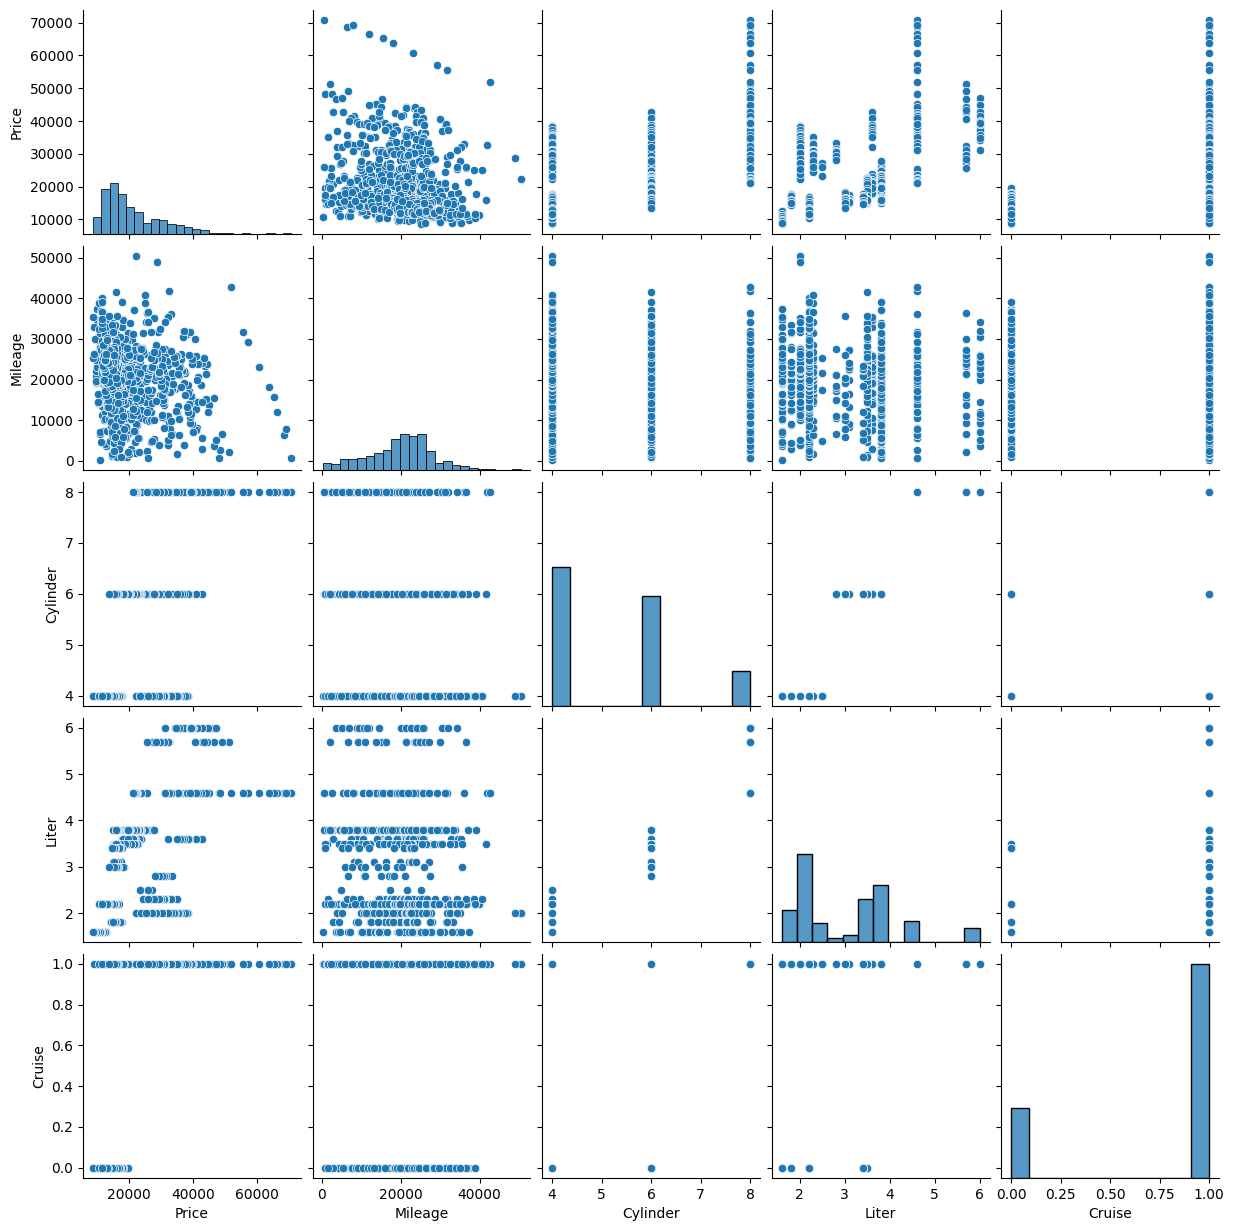

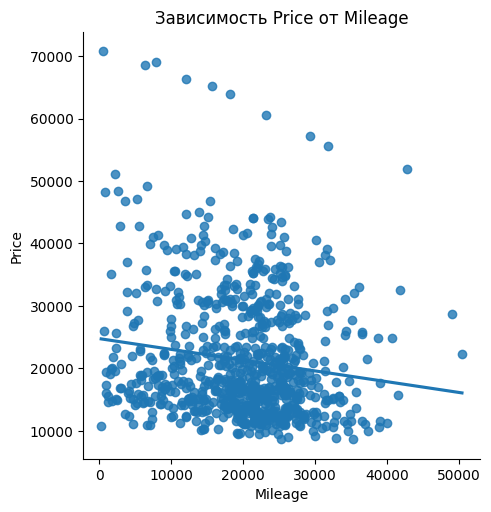

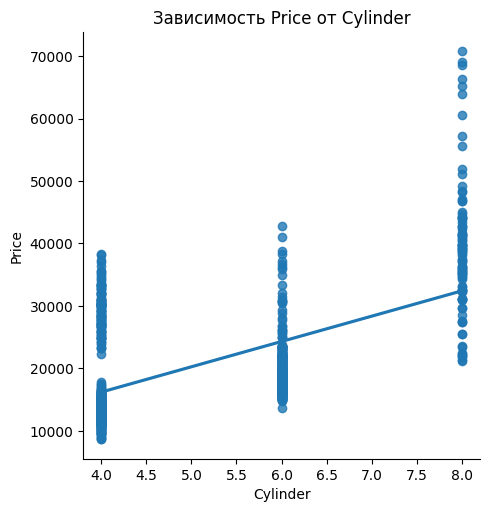

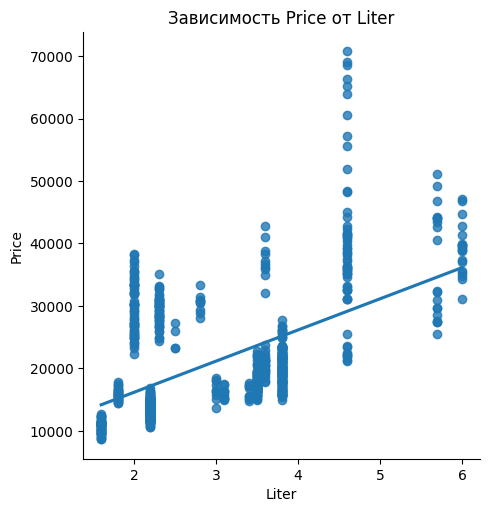

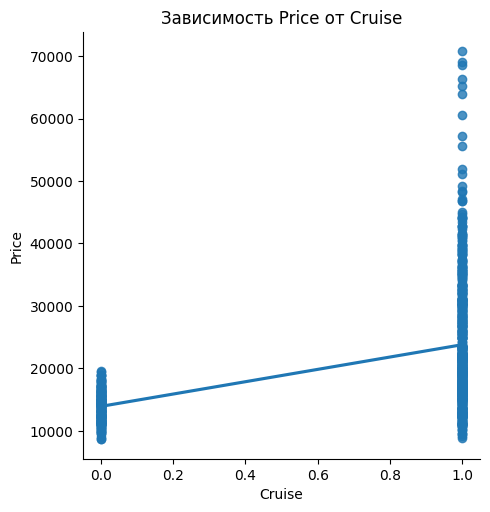

In [161]:
# Построение графиков рассеяния
sns.pairplot(data)
#Построение уравнений регрессии с коэффициентами из модели
sns.lmplot(x='Mileage', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Mileage')

sns.lmplot(x='Cylinder', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Cylinder')

sns.lmplot(x='Liter', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Liter')

sns.lmplot(x='Cruise', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Cruise')


plt.show()

## Шаг 7: Доверительные интервалы для коэффициентов регрессии

In [162]:
# Построение доверительных интервалов
conf_intervals = model.conf_int()
print('Доверительные интервалы для коэффициентов:')
print(conf_intervals)

Доверительные интервалы для коэффициентов:
                    0            1
const     -229.475428  5829.189134
Mileage     -0.229222    -0.099555
Cylinder  1674.435862  4341.169490
Liter    -1233.565163  2145.027273
Cruise    4747.983509  7404.114008


## Шаг 8: Проверка на наличие выбросов

In [163]:
# Проверка на важные наблюдения
influence = model.get_influence()
summary_influence = influence.summary_frame()

"""Интерпритация результатов:
cooks_d - показывает влиятельность наблюдения на модель. Чем больше значение, тем более влиятельно наблюдение.
standard_resid - стандартизированные остатки. Если значение больше 3, то наблюдение считается важным.
hat_diag - диагональные элементы матрицы влиятельности. Если значение больше 2 * (кол-во факторов + 1) / кол-во наблюдений, то наблюдение считается важным.
"""

#Важные наблюдения
important_observations = summary_influence[summary_influence['cooks_d'] > 4/len(data)]

# Вычисление стандартизированных остатков
standard_resid = summary_influence['standard_resid']

# Идентификация выбросов в important_observations
outliers = important_observations[important_observations['standard_resid'] > 3]
print("Выбросы по стандартизированным остаткам:")
outliers

Выбросы по стандартизированным остаткам:


,dfb_const,dfb_Mileage,dfb_Cylinder,dfb_Liter,dfb_Cruise,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
150,-0.172911,-0.381066,0.348704,-0.268159,0.030076,0.070927,4.713360,0.015712,0.595513,4.777293,0.603591
151,-0.219500,-0.249838,0.339854,-0.261111,0.025004,0.051685,4.543803,0.012362,0.508356,4.600790,0.514732
152,-0.238375,-0.225604,0.348986,-0.268064,0.024579,0.051242,4.648636,0.011717,0.506174,4.709854,0.512840
153,-0.259873,-0.132549,0.330617,-0.253792,0.020408,0.039942,4.372332,0.010339,0.446891,4.422827,0.452052
154,-0.286519,-0.062899,0.327931,-0.251593,0.017811,0.036136,4.304641,0.009657,0.425065,4.352716,0.429813
155,-0.299812,-0.013451,0.320130,-0.245512,0.015688,0.033385,4.180779,0.009460,0.408566,4.224626,0.412851
156,-0.314095,0.071669,0.297687,-0.228132,0.011604,0.029303,3.850212,0.009787,0.382775,3.884001,0.386134
157,-0.331130,0.159508,0.276935,-0.212043,0.007505,0.028922,3.536196,0.011432,0.380275,3.561966,0.383046
158,-0.335042,0.190817,0.267274,-0.204572,0.005936,0.029234,3.394034,0.012530,0.382321,3.416628,0.384866
159,-0.382079,0.329184,0.255756,-0.195463,0.000484,0.040723,3.163190,0.019944,0.451238,3.181191,0.453806


In [164]:
#Удаление выбросов
data = data.drop(outliers.index)

In [165]:
#Модель без выбросов
X = data[['Mileage', 'Cylinder', 'Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)

model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.36e-87
Time:                        17:54:58   Log-Likelihood:                -8126.8
No. Observations:                 794   AIC:                         1.626e+04
Df Residuals:                     789   BIC:                         1.629e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7547.8764   1405.196      5.371      0.000    4789.512    1.03e+04
Mileage       -0.1540      0.030     -5.203      0.000      -0.212      -0.096
Cylinder     723.3562    618.520      1.169      0.243    -490.784    1937.496
Liter       2675.6794    773.999      3.457      0.001    1156.338    4195.021
Cruise      5960.3690    597.574      9.974      0.000    4787.346    7133.392
==============================================================================
Omnibus:                       79.397   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.836
Skew:                           0.834   Prob(JB):                     9.38e-22
Kurtosis:                       2.621   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___


## Шаг 9: Улучшение модели с помощью StepAIC

In [166]:
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def step_aic(X, y):
    while True:
        X_const = add_constant(X)
        model = OLS(y, X_const).fit()
        aic = model.aic
        
        # Вычисление VIF
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        # Поиск переменной с наибольшим VIF
        max_vif = vif_data["VIF"].max()
        if max_vif > 10:
            feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            X = X.drop(columns=[feature_to_remove])
            print(f"Удален признак {feature_to_remove} из-за мультиколлинеарности (VIF={max_vif})")
        else:
            break
    return model

# Пример использования
X = data[['Mileage', 'Cylinder', 'Liter', 'Cruise']]
y = data['Price']

final_model = step_aic(X, y)
print(final_model.summary())

Удален признак Cylinder из-за мультиколлинеарности (VIF=86.16519051727123)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.58e-88
Time:                        17:54:58   Log-Likelihood:                -8127.5
No. Observations:                 794   AIC:                         1.626e+04
Df Residuals:                     790   BIC:                         1.628e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

___

In [167]:
# Загрузка данных
data = pd.read_excel('data/kuiper.xls')

data = data[["Price", "Mileage", "Liter", "Cruise"]]
data.head()


,Price,Mileage,Liter,Cruise
0,17314.103129,8221,3.1,1
1,17542.036083,9135,3.1,1
2,16218.847862,13196,3.1,1
3,16336.913140,16342,3.1,1
4,16339.170324,19832,3.1,1


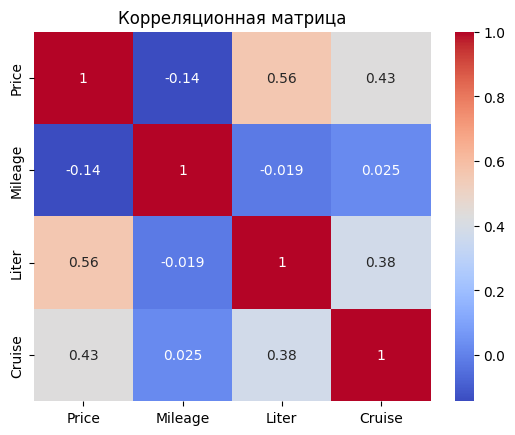

In [168]:
# Проведение корреляционного анализа
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

## Шаг 2: Базовая модель линейной регрессии

In [169]:
# Построение базовой модели линейной регрессии
X = data[['Mileage', 'Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)  # Добавление константы

model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           7.43e-85
Time:                        17:54:58   Log-Likelihood:                -8338.8
No. Observations:                 804   AIC:                         1.669e+04
Df Residuals:                     800   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7804.9706   1062.866      7.343      0.000    5718.636    9891.305
Mileage       -0.1702      0.033     -5.097      0.000      -0.236      -0.105
Liter       4082.5030    267.197     15.279      0.000    3558.014    4606.993
Cruise      5997.5379    684.158      8.766      0.000    4654.581    7340.495
==============================================================================
Omnibus:                      233.002   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.003
Skew:                           1.471   Prob(JB):                    2.59e-137
Kurtosis:                       6.182   Cond. No.                     8.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Шаг 3: Уравнение линейной регрессии

In [170]:

# Вывод уравнения регрессии
coefficients = model.params
equation = f"Price = {coefficients['const']:.4f} + {coefficients['Mileage']:.4f} * Mileage  + {coefficients['Liter']:.4f} * Liter + {coefficients['Cruise']:.4f} * Cruise"
print("Уравнение линейной регрессии:")
print(equation)


Уравнение линейной регрессии:
Price = 7804.9706 + -0.1702 * Mileage  + 4082.5030 * Liter + 5997.5379 * Cruise


## Шаг 4: Проверка значимости коэффициентов с помощью T-теста

In [171]:
# Проверка значимости каждого коэффициента
print(model.t_test(np.eye(len(model.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          7804.9706   1062.866      7.343      0.000    5718.636    9891.305
c1            -0.1702      0.033     -5.097      0.000      -0.236      -0.105
c2          4082.5030    267.197     15.279      0.000    3558.014    4606.993
c3          5997.5379    684.158      8.766      0.000    4654.581    7340.495


## Шаг 5: Проверка значимости уравнения регрессии с помощью F-теста

In [172]:
# Проведение F-теста
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f'F-статистика: {f_stat}, p-значение: {f_pvalue}')

F-статистика: 169.0090658480708, p-значение: 7.434674833475229e-85


## Шаг 6: График рассеяния и уравнение регрессии

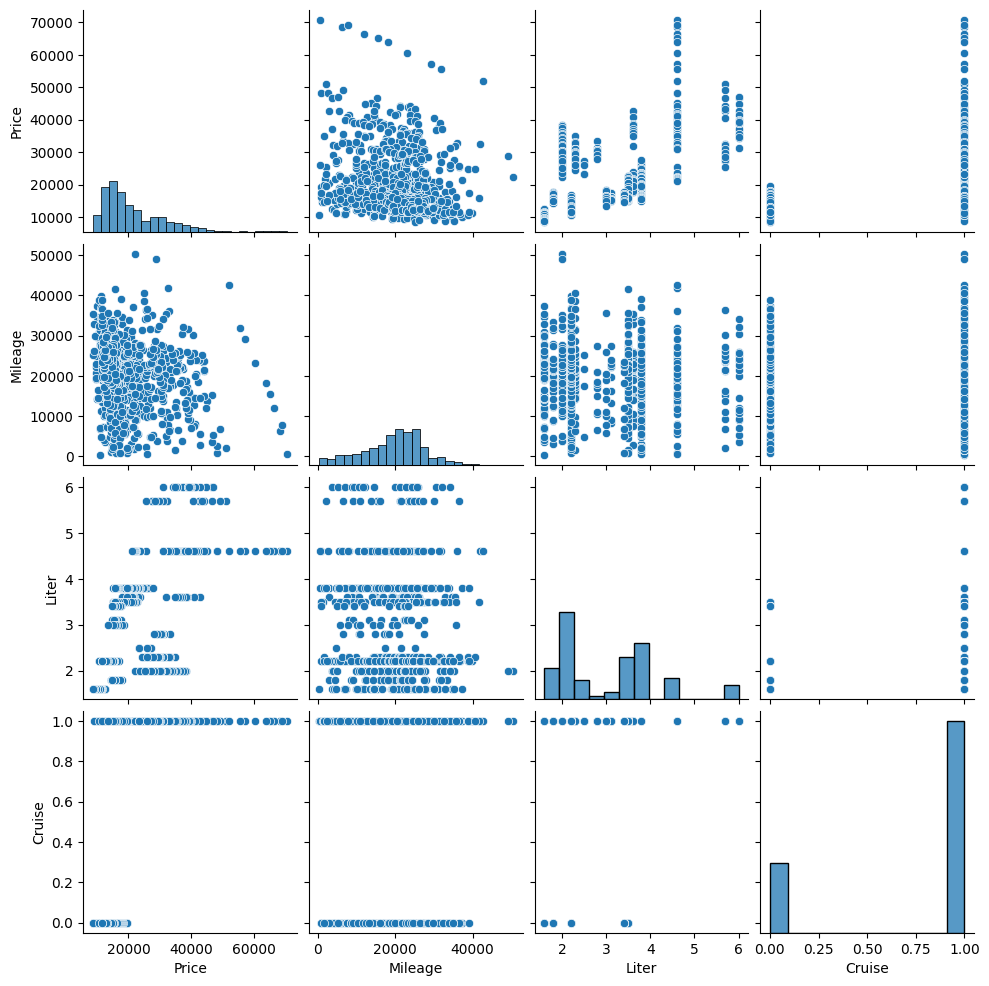

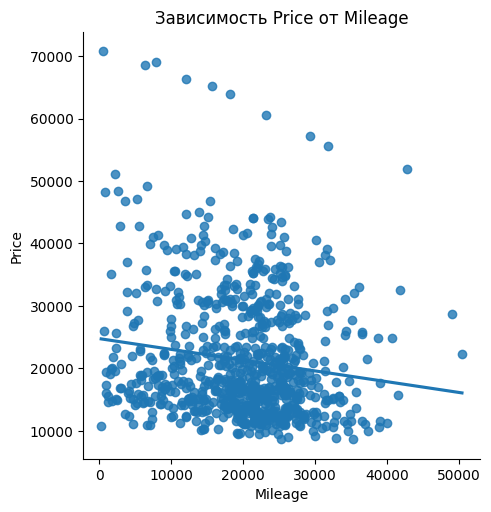

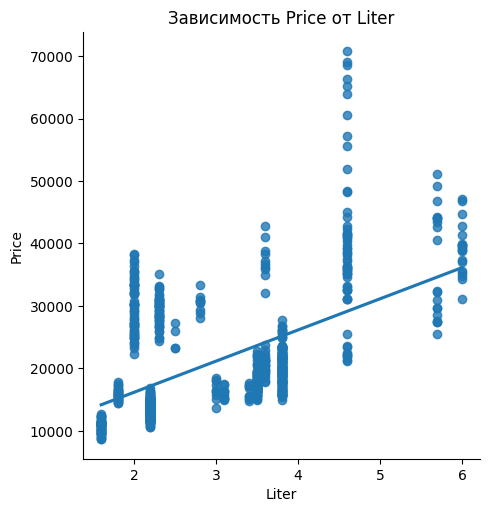

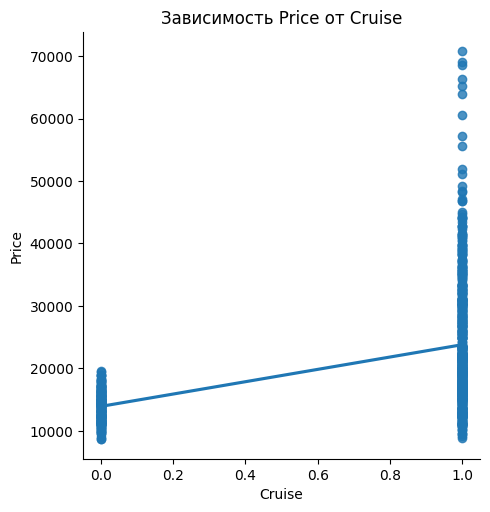

In [173]:
# Построение графиков рассеяния
sns.pairplot(data)
#Построение уравнений регрессии с коэффициентами из модели
sns.lmplot(x='Mileage', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Mileage')

sns.lmplot(x='Liter', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Liter')

sns.lmplot(x='Cruise', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Cruise')


plt.show()

## Шаг 7: Доверительные интервалы для коэффициентов регрессии

In [174]:
# Построение доверительных интервалов
conf_intervals = model.conf_int()
print('Доверительные интервалы для коэффициентов:')
print(conf_intervals)

Доверительные интервалы для коэффициентов:
                   0            1
const    5718.635914  9891.305346
Mileage    -0.235699    -0.104635
Liter    3558.013526  4606.992535
Cruise   4654.580757  7340.495035


## Шаг 8: Проверка на наличие выбросов

In [175]:
# Проверка на важные наблюдения
influence = model.get_influence()
summary_influence = influence.summary_frame()

"""Интерпритация результатов:
cooks_d - показывает влиятельность наблюдения на модель. Чем больше значение, тем более влиятельно наблюдение.
standard_resid - стандартизированные остатки. Если значение больше 3, то наблюдение считается важным.
hat_diag - диагональные элементы матрицы влиятельности. Если значение больше 2 * (кол-во факторов + 1) / кол-во наблюдений, то наблюдение считается важным.
"""

#Важные наблюдения
important_observations = summary_influence[summary_influence['cooks_d'] > 4/len(data)]

# Вычисление стандартизированных остатков
standard_resid = summary_influence['standard_resid']

# Идентификация выбросов в important_observations
outliers = important_observations[important_observations['standard_resid'] > 3]
print("Выбросы по стандартизированным остаткам:")
outliers

Выбросы по стандартизированным остаткам:


,dfb_const,dfb_Mileage,dfb_Liter,dfb_Cruise,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
150,0.127509,-0.415856,0.218459,0.022042,0.065217,4.965786,0.010468,0.510754,5.040981,0.518488
151,0.045615,-0.278121,0.214400,0.016998,0.040483,4.802133,0.006973,0.402406,4.869831,0.408079
152,0.026684,-0.252569,0.220084,0.016275,0.038102,4.906399,0.006291,0.390395,4.978813,0.396157
153,-0.027562,-0.154338,0.210027,0.012442,0.025969,4.636637,0.004809,0.322296,4.697283,0.326511
154,-0.072186,-0.080528,0.209123,0.009781,0.021176,4.572268,0.004035,0.291039,4.630310,0.294734
155,-0.102051,-0.027776,0.204985,0.007764,0.018761,4.451931,0.003772,0.273939,4.505307,0.277223
156,-0.151097,0.064207,0.192555,0.004074,0.016993,4.129592,0.003970,0.260717,4.171713,0.263377
157,-0.203461,0.160538,0.181258,0.000267,0.020063,3.824565,0.005457,0.283289,3.857603,0.285736
158,-0.221810,0.195597,0.175926,-0.001159,0.022183,3.686407,0.006487,0.297879,3.715797,0.300254
159,-0.312984,0.349395,0.170928,-0.006806,0.041479,3.467768,0.013609,0.407328,3.491945,0.410168


In [176]:
#Удаление выбросов
data = data.drop(outliers.index)

In [177]:
#Модель без выбросов
X = data[['Mileage', 'Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)

model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.58e-88
Time:                        17:55:01   Log-Likelihood:                -8127.5
No. Observations:                 794   AIC:                         1.626e+04
Df Residuals:                     790   BIC:                         1.628e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8773.5201    936.299      9.370      0.000    6935.593    1.06e+04
Mileage       -0.1553      0.030     -5.250      0.000      -0.213      -0.097
Liter       3537.8468    235.832     15.002      0.000    3074.915    4000.779
Cruise      5940.5903    597.474      9.943      0.000    4767.767    7113.414
==============================================================================
Omnibus:                       80.181   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.666
Skew:                           0.844   Prob(JB):                     3.76e-22
Kurtosis:                       2.634   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___

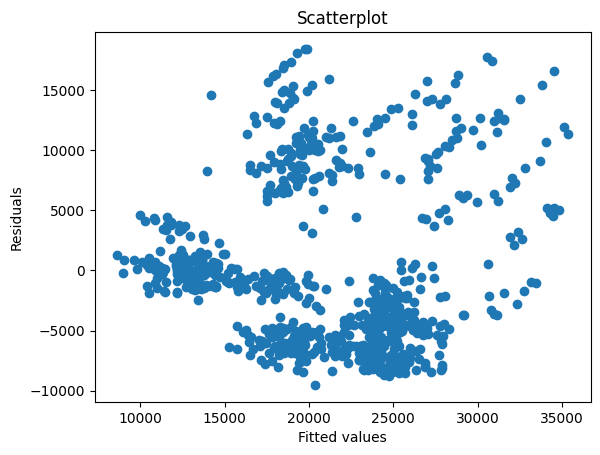

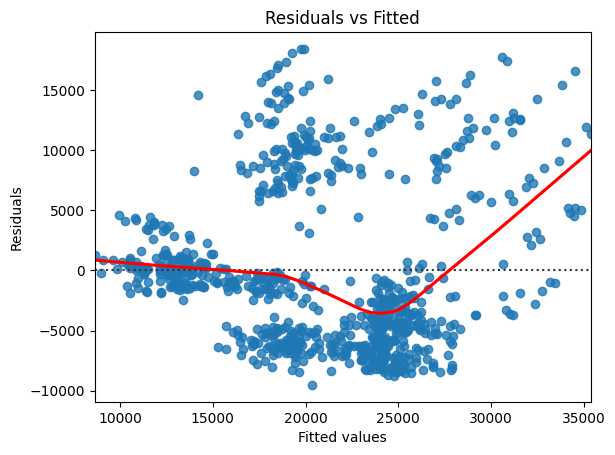

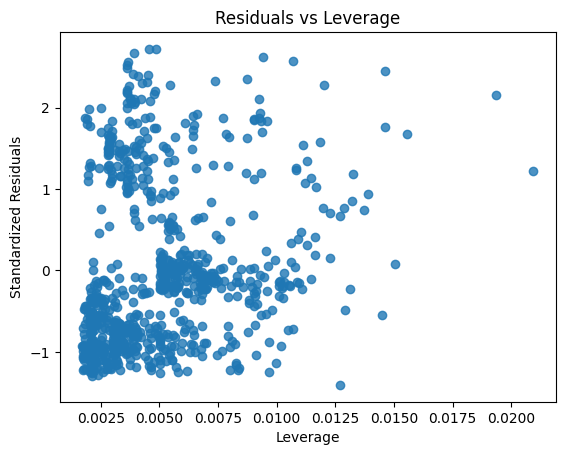

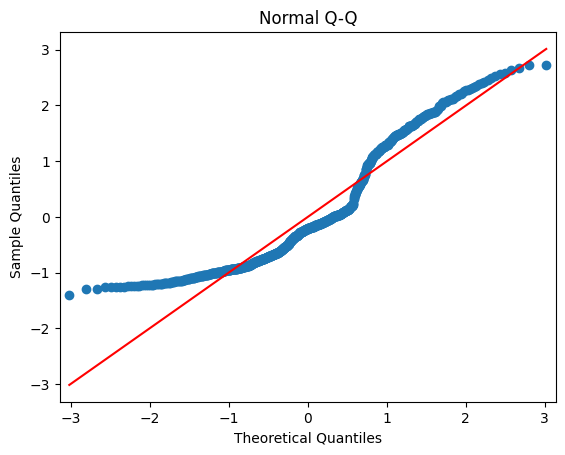

In [178]:
#Построим графики: scatterplot, "Residuals vs Fitted", "Normal Q-Q" , "Residuals vs Leverage"
# Scatterplot
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Scatterplot')
plt.show()

# Residuals vs Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Residuals vs Leverage
sns.regplot(x=model.get_influence().hat_matrix_diag, y=model.resid_pearson, fit_reg=False)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')
plt.show()

# Normal Q-Q
qqplot(model.resid_pearson, line='s')
plt.title('Normal Q-Q')
plt.show()



In [179]:
#Проверим модель на наличие выбросов


In [180]:
# Проверка на гетероскедастичность
bp_test = het_breuschpagan(model.resid, X)

print(f'LM-статистика: {bp_test[0]}, p-значение: {bp_test[1]}')

# Проверка на автокорреляцию
bg_test = acorr_breusch_godfrey(model, nlags=1)

print(f'LM-статистика: {bg_test[0]}, p-значение: {bg_test[1]}')

# Проверка на нормальность
jb_test = stats.jarque_bera(model.resid)

print(f'JB-статистика: {jb_test[0]}, p-значение: {jb_test[1]}')

# Проверка на мультиколлинеарность
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('VIF:')
print(vif_data)



LM-статистика: 159.6448839366569, p-значение: 2.186586957043777e-34
LM-статистика: 658.4575873359377, p-значение: 3.234228553238805e-145
JB-статистика: 98.66563295386757, p-значение: 3.758633907591798e-22
VIF:
   feature        VIF
0    const  15.204810
1  Mileage   1.001523
2    Liter   1.162352
3   Cruise   1.162836


In [181]:
#Попробуем применить трансформацию Box-Cox зависимой переменной
y_boxcox, lmbda = boxcox(y)
model = OLS(y_boxcox, X).fit()

# Вывод уравнения регрессии
coefficients = model.params
equation = f"Price = {coefficients['const']:.4f} + {coefficients['Mileage']:.4f} * Mileage  + {coefficients['Liter']:.4f} * Liter + {coefficients['Cruise']:.4f} * Cruise"
print("Уравнение линейной регрессии:")
print(equation)



Уравнение линейной регрессии:
Price = 2.0086 + -0.0000 * Mileage  + 0.0012 * Liter + 0.0024 * Cruise


___

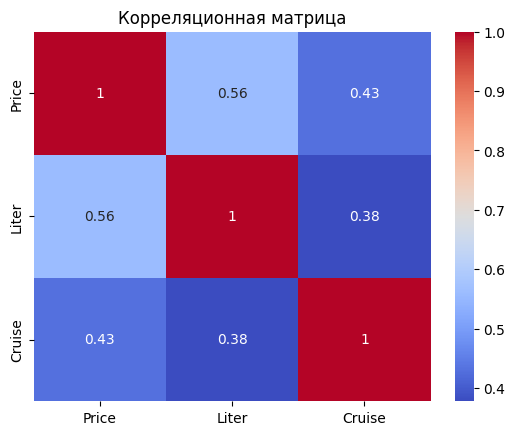

Уравнение линейной регрессии:
Price = 4395.6033 + 4123.8334 * Liter + 5876.7296 * Cruise
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          4395.6033    838.792      5.240      0.000    2749.114    6042.092
c1          4123.8334    271.206     15.206      0.000    3591.474    4656.193
c2          5876.7296    694.328      8.464      0.000    4513.813    7239.647
F-статистика: 233.24850752236364, p-значение: 1.4947588102043739e-80


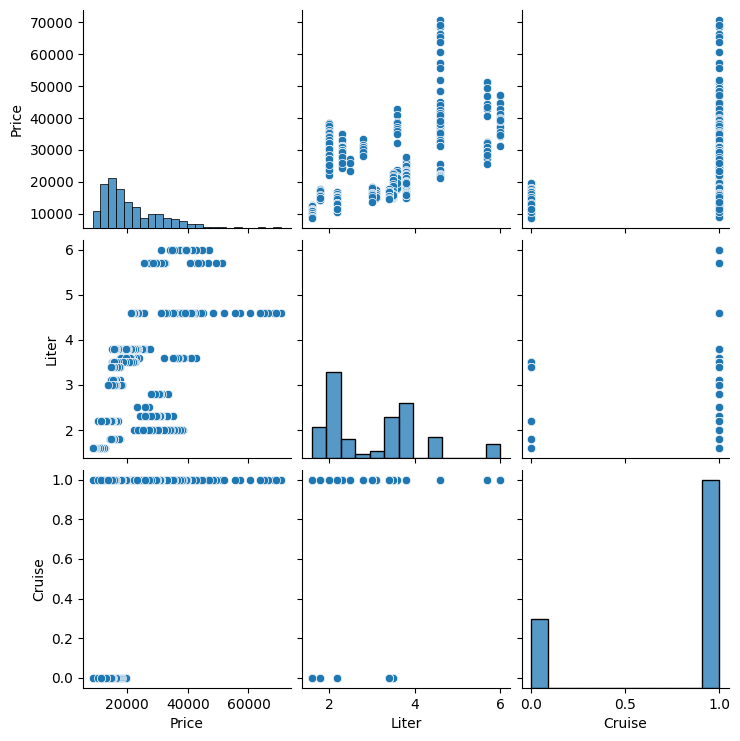

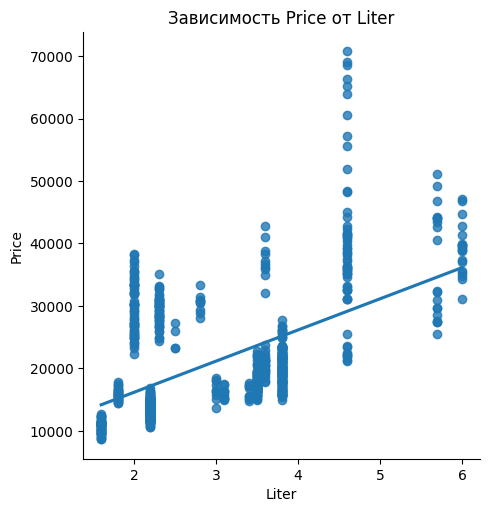

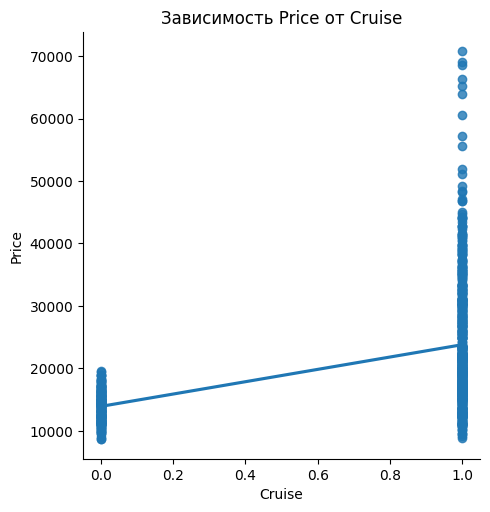

Доверительные интервалы для коэффициентов:
                  0            1
const   2749.114227  6042.092320
Liter   3591.474215  4656.192595
Cruise  4513.812541  7239.646573
Выбросы по стандартизированным остаткам:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.19e-83
Time:                        17:56:41   Log-Likelihood:                -8156.9
No. Observations:                 795   AIC:                         1.632e+04
Df Residuals:                     792   BIC:                         1.633e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5576.7118    742.488      7.511      0.000    4119.234    7034.189
Liter       3612.5421    241.084     14.985      0.000    3139.303    4085.782
Cruise      5833.4693    611.321      9.542      0.000    4633.468    7033.470
==============================================================================
Omnibus:                       80.547   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.854
Skew:                           0.889   Prob(JB):                     1.70e-23
Kurtosis:                       2.916   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Загрузка данных
data = pd.read_excel('data/kuiper.xls')

data = data[["Price", "Liter", "Cruise"]]
data.head()

# Проведение корреляционного анализа
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()
## Шаг 2: Базовая модель линейной регрессии
# Построение базовой модели линейной регрессии
X = data[['Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)  # Добавление константы

model = OLS(y, X).fit()
model.summary()
## Шаг 3: Уравнение линейной регрессии

# Вывод уравнения регрессии
coefficients = model.params
equation = f"Price = {coefficients['const']:.4f} + {coefficients['Liter']:.4f} * Liter + {coefficients['Cruise']:.4f} * Cruise"
print("Уравнение линейной регрессии:")
print(equation)

## Шаг 4: Проверка значимости коэффициентов с помощью T-теста
# Проверка значимости каждого коэффициента
print(model.t_test(np.eye(len(model.params))))
## Шаг 5: Проверка значимости уравнения регрессии с помощью F-теста
# Проведение F-теста
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f'F-статистика: {f_stat}, p-значение: {f_pvalue}')
## Шаг 6: График рассеяния и уравнение регрессии
# Построение графиков рассеяния
sns.pairplot(data)
#Построение уравнений регрессии с коэффициентами из модели

sns.lmplot(x='Liter', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Liter')

sns.lmplot(x='Cruise', y='Price', data=data, ci=None)
plt.title('Зависимость Price от Cruise')


plt.show()
## Шаг 7: Доверительные интервалы для коэффициентов регрессии
# Построение доверительных интервалов
conf_intervals = model.conf_int()
print('Доверительные интервалы для коэффициентов:')
print(conf_intervals)
## Шаг 8: Проверка на наличие выбросов
# Проверка на важные наблюдения
influence = model.get_influence()
summary_influence = influence.summary_frame()

"""Интерпритация результатов:
cooks_d - показывает влиятельность наблюдения на модель. Чем больше значение, тем более влиятельно наблюдение.
standard_resid - стандартизированные остатки. Если значение больше 3, то наблюдение считается важным.
hat_diag - диагональные элементы матрицы влиятельности. Если значение больше 2 * (кол-во факторов + 1) / кол-во наблюдений, то наблюдение считается важным.
"""

#Важные наблюдения
important_observations = summary_influence[summary_influence['cooks_d'] > 4/len(data)]

# Вычисление стандартизированных остатков
standard_resid = summary_influence['standard_resid']

# Идентификация выбросов в important_observations
outliers = important_observations[important_observations['standard_resid'] > 3]
print("Выбросы по стандартизированным остаткам:")
outliers
#Удаление выбросов
data = data.drop(outliers.index)
#Модель без выбросов
X = data[['Liter', 'Cruise']]
y = data['Price']
X = add_constant(X)

model = OLS(y, X).fit()
model.summary()